In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(
    "STEMVisualsSynthData.csv",
    names = [
        'Index_within_Experiment',
        'Time',
        'C_X',
        'C_N',
        'C_L',
        'C_x0',
        'C_N0',
        'F_in',
        'C_N_in',
        'I0'
    ])
    

In [3]:
df

,Index_within_Experiment,Time,C_X,C_N,C_L,C_x0,C_N0,F_in,C_N_in,I0
0,Index_within_Experiment,Time,C_X,C_N,C_L,C_x0,C_N0,F_in,C_N_in,I0
1,0,0,1.5,1.6,0,1.5,1.6,0.006,7,103
2,1,0.753768844,1.524642929,1.622073457,7.45E-05,1.5,1.6,0.006,7,103
3,2,1.507537688,1.548986453,1.644204727,0.000148165,1.5,1.6,0.006,7,103
4,3,2.261306533,1.573020863,1.666397183,0.000220839,1.5,1.6,0.006,7,103
...,...,...,...,...,...,...,...,...,...,...
19996,195,146.9849246,2.937322964,11.1514571,0.006985099,0.3,0.6,0.009,9,116
19997,196,147.7386935,2.939438747,11.20784764,0.006985492,0.3,0.6,0.009,9,116
19998,197,148.4924623,2.941519636,11.26424595,0.006985804,0.3,0.6,0.009,9,116
19999,198,149.2462312,2.943566238,11.32065189,0.006986038,0.3,0.6,0.009,9,116


In [4]:
df = df.drop(labels=0, axis=0)

In [5]:
df

,Index_within_Experiment,Time,C_X,C_N,C_L,C_x0,C_N0,F_in,C_N_in,I0
1,0,0,1.5,1.6,0,1.5,1.6,0.006,7,103
2,1,0.753768844,1.524642929,1.622073457,7.45E-05,1.5,1.6,0.006,7,103
3,2,1.507537688,1.548986453,1.644204727,0.000148165,1.5,1.6,0.006,7,103
4,3,2.261306533,1.573020863,1.666397183,0.000220839,1.5,1.6,0.006,7,103
5,4,3.015075377,1.596735073,1.688654616,0.000292554,1.5,1.6,0.006,7,103
...,...,...,...,...,...,...,...,...,...,...
19996,195,146.9849246,2.937322964,11.1514571,0.006985099,0.3,0.6,0.009,9,116
19997,196,147.7386935,2.939438747,11.20784764,0.006985492,0.3,0.6,0.009,9,116
19998,197,148.4924623,2.941519636,11.26424595,0.006985804,0.3,0.6,0.009,9,116
19999,198,149.2462312,2.943566238,11.32065189,0.006986038,0.3,0.6,0.009,9,116


In [6]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size=0.2)

In [7]:
x_train = df_train.iloc[:, [1, 5, 6, 7, 8, 9]]
y_train = df_train.iloc[:, [2, 3, 4]]

x_test = df_test.iloc[:, [1, 5, 6, 7, 8, 9]]
y_test = df_test.iloc[:, [2, 3, 4]]

all_x = df.iloc[:, [1, 5, 6, 7, 8, 9]]
all_y = df.iloc[:, [2, 3, 4]]

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [8]:
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(x_train, y_train)
gaussian_process.kernel_

8.99**2 * RBF(length_scale=4.59)

In [10]:
mean_prediction, std_prediction = gaussian_process.predict(x_test, return_std=True)

In [9]:
import matplotlib.pyplot as plt

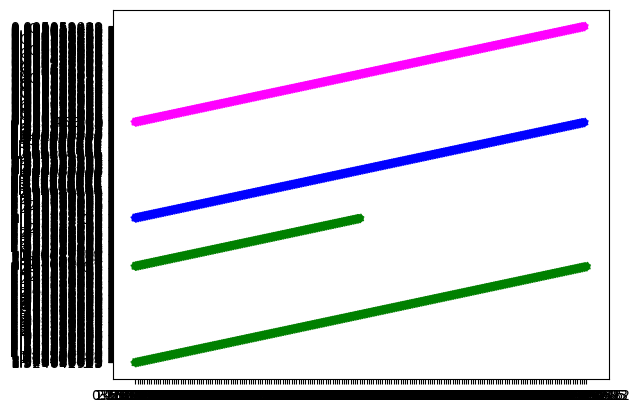

In [32]:
#trying things
#type(all_x)
#all_x

plt.scatter(all_x.iloc[0:199, 0], all_y.iloc[0:199, 0], label='C_x', linestyle="dotted", color = 'green')
plt.scatter(all_x.iloc[0:199, 0], all_y.iloc[0:199, 1], label='C_N', linestyle="dotted", color = 'blue')
plt.scatter(all_x.iloc[0:199, 0], all_y.iloc[0:199, 2], label='C_L', linestyle="dotted", color = 'magenta')



In [41]:
#trying stuff
mean_prediction

array([[3.29898671e+00, 1.17450830e+01, 4.66851402e-03],
       [3.41526839e+00, 7.91218953e+00, 5.50703782e-03],
       [3.09256916e+00, 1.07427026e+01, 5.12176373e-03],
       ...,
       [3.36863182e+00, 6.72053997e+00, 5.49250218e-03],
       [2.73190418e+00, 5.83026262e+00, 3.98747010e-03],
       [2.77439333e+00, 6.13223941e-01, 3.34069416e-03]])

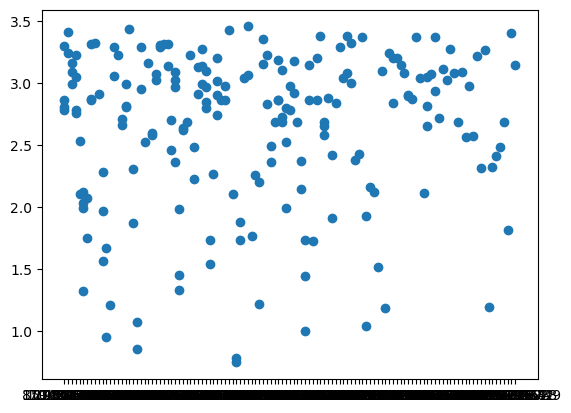

In [43]:
#more trying stuff code

#extract data from mean predictions array
C_X_pred = [value[0] for value in mean_prediction]
C_X_pred
plt.scatter(x_test.iloc[0:199, 0], C_X_pred[0:199])


mean_prediction, std_prediction = gaussian_process.predict(x_test, return_std=True)

plt.plot(all_x, all_y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(x_test, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")